### Overview / Business Understanding
Per Wikipedia, Kickstarter is an American public benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity.The company's stated mission is to "help bring creative projects to life". As of December 2019, Kickstarter has received more than $4.6 billion in pledges from 17.2 million backers to fund 445,000 projects, such as films, music, stage shows, comics, journalism, video games, technology, publishing, and food-related projects.

I will be exploring Kickstarter dataset available on [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv). The purpose of this exercise is to see if we can answers some of these questions
 1. How popular is Kickstarter? How many projects funding campaigns are lauched on average in a month?
 2. What percentage of campaigns are successful?
 3. What are different categories of projects? Is Technology the dominant category?
 4. What makes a campaign successful? Is it the category, goal amount, duration, month or weekday of launch date etc.?
 5. What are some of the most successful campaigns?

In [241]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Data Understanding

In [242]:
# Lets load and take a look at our data (it was downloaded from Kaggle to my local drive earlier. Link available above in the overview)
ks =  pd.read_csv('ks-projects-201801.csv')
print(ks.shape)

(378661, 15)


We have 378661 observations and 15 features

In [243]:
# Get a glimpse of data
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Goal and Pledge amounts in different currencies have been converted to USD by Kickstarter and also by other utilities. Here is the definition of those columns from Kaggle 
 - usd pledged:     conversion in US dollars of the pledged column (conversion done by kickstarter)
 - usd_pledge_real: conversion in US dollars of the pledged column (conversion from Fixer.io API)
 - usd_goal_real:   conversion in US dollars of the goal column (conversion from Fixer.io API)

In [244]:
# Look at data types
ks.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

Here deadline and launched both got loaded as objects. We will have to convert them to datetime.

In [245]:
#Check for NaN
ks.isnull().sum(axis=0)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

There are 4 NaN entry for name and 3797 entries from 'usd pledged' column

## Prepare Data

In [246]:
# Lets see how we can handle these NaN entries
ks[ks.name.isnull()==True]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [247]:
# Check number of unique values in name column
len(ks.name.unique())

375765

There are 375765 unique names in the dataset. Updating these missing names to 'Missing'.

In [248]:
# Update NaN to 'Missing' in name column
ks.loc[ks.name.isnull()==True,'name']='Missing'

In [249]:
# Look and rows with NaN for 'usd pledged' column
ks[ks['usd pledged'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


Not Sure why KickStarter populated these 'usd pledged' values with NaN. Maybe there was some issue with currency conversion??? However usd_pledged_real column appears to have correct value. I will be using usd_pledged_real and usd_goal_real for my analysis.

Kickstarter has an [api](http://www.kickstarter.com/projects/search.json?search=&term=TERM_HERE) to search for projects. It returns json object that can be parsed to update some of these missing values. Maybe these values were not available when data was extracted. Will work on it later as a different project

In [250]:
# Drop 'usd pledged' and goal columns
ks = ks.drop(['usd pledged', 'goal'], axis=1)

In [251]:
#convert deadline and launched columns to datetime type
ks.deadline = pd.to_datetime(ks.deadline)
ks.launched = pd.to_datetime(ks.launched)

In [252]:
# verify data types
ks.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [253]:
# Lets create columns for launch_year, launch_month and duration a campaign ran
# We can use these features to answer questions like "Are project campaigns more successful when launched on a specific month/weekday caompared to others"
ks['launch_year']=ks.launched.dt.year
ks['launch_month']=ks.launched.dt.month_name()
ks['launch_weekday']=ks.launched.dt.day_name()
ks['duration']=(ks.deadline - ks.launched).dt.days
ks.head()

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,launch_month,launch_weekday,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,2015,August,Tuesday,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,2017,September,Saturday,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,2013,January,Saturday,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,2012,March,Saturday,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,2015,July,Saturday,55


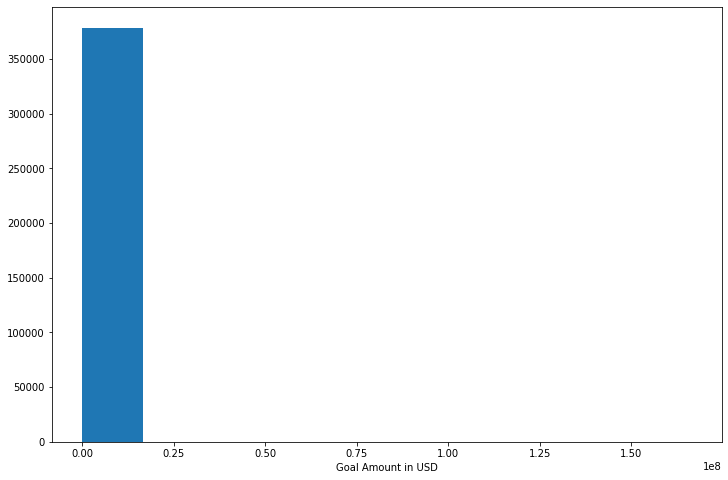

In [254]:
#Lets look at the distribution of usd_goal_real
plt.figure(figsize=(12,8))
plt.hist(ks.usd_goal_real);
plt.xlabel('Goal Amount in USD')
plt.show()

It appears we have some projects with extremely high goal amount causing the histogram to scale this way. Let's plot the log goal amount.

In [255]:
# Check if we have zero or negative goal amounts
ks[ks.usd_goal_real <=0 ].shape[0]

0

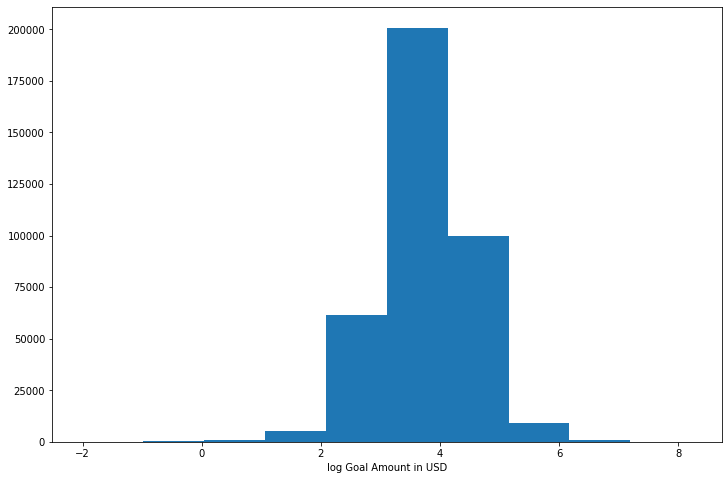

In [256]:
#Cool, we do not have any zero or negative goal amount. It would have caused problems as log of zero or a negative number is not defined.
# Plotting log usd_goal_real
plt.figure(figsize=(12,8))
plt.hist(np.log10(ks.usd_goal_real))
plt.xlabel('log Goal Amount in USD')
plt.show()

In [257]:
# What percentage of projects did not get any pledge
ks[ks.usd_pledged_real ==0].shape[0]/ks.shape[0]

0.1387177448958303

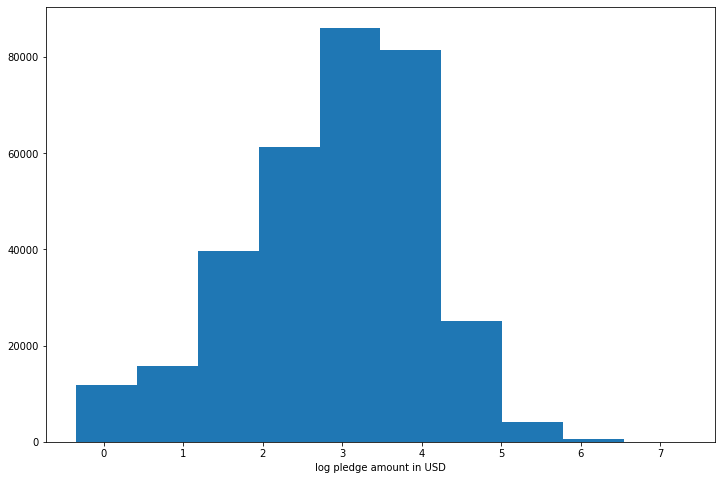

In [258]:
# Nearly 14% of the Projects did not receive any pledge. I think we will still get a good picture of the distribution of pledge amounts if we remove these projects while plotting
plt.figure(figsize=(12,8))
plt.hist(np.log10(ks.loc[ks['usd_pledged_real'] > 0, 'usd_pledged_real']));
plt.xlabel('log pledge amount in USD')
plt.show();

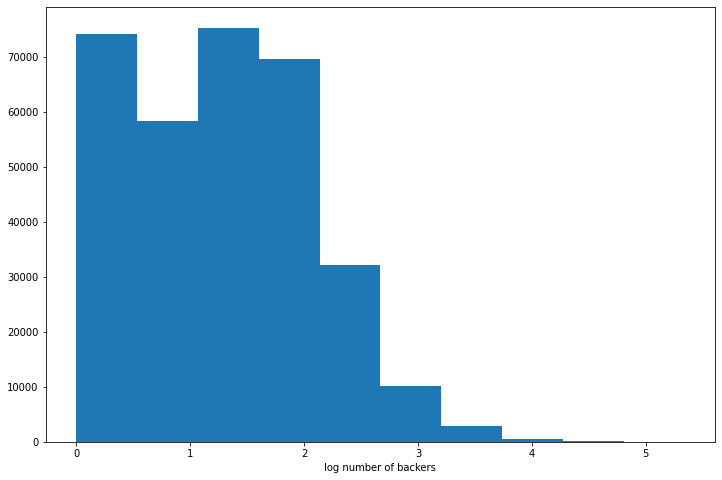

In [259]:
#Lets look at the distribution of number of backers. 
plt.figure(figsize=(12,8))
np.log10(ks.loc[ks['backers'] > 0, 'backers'])
plt.hist(np.log10(ks.loc[ks['backers'] > 0, 'backers']));
plt.xlabel('log number of backers')
plt.show();

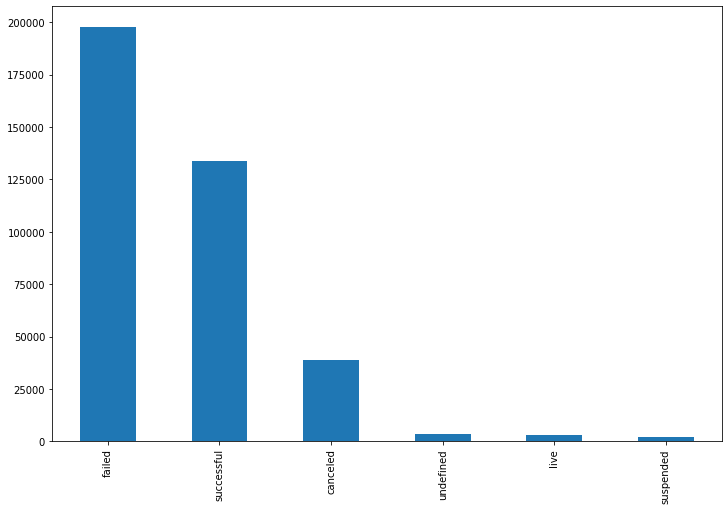

In [260]:
# Lets look at count of projects in different statuses
plt.figure(figsize=(12,8))
ks.state.value_counts().plot(kind='bar');

We have a very high number of failed projects. Lets look further into projects in undefined state. Not sure what it means?

In [261]:
# Porjects in undefined state
ks[ks.state=='undefined']

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,launch_month,launch_weekday,duration
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",555.00,6500.00,2014,August,Wednesday,44
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",3402.08,3211.53,2015,August,Tuesday,20
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",3576.00,3500.00,2015,March,Tuesday,29
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",7007.80,6000.00,2015,November,Monday,23
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",3660.38,3000.00,2016,February,Tuesday,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",10.00,7500.00,2014,December,Friday,59
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",2845.61,2752.04,2014,April,Tuesday,44
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",235.00,5000.00,2016,January,Wednesday,29
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",3273.36,3080.81,2015,September,Monday,27


Interesting, some of these projects have met their goal and are still in undefined state. I think it is safe to update the state to successful if pledged amount is more than or equal to goal amount.

In [262]:
# Investigate further before updating state
ks.loc[(ks.usd_pledged_real >= ks.usd_goal_real) & (ks.state != 'successful'), 'state'].value_counts()

undefined    1654
canceled      698
live          441
suspended     292
failed          6
Name: state, dtype: int64

In [263]:
# Projects in failed status even after pledge met or exceeded goal
ks.loc[(ks.usd_pledged_real >= ks.usd_goal_real) & (ks.state == 'failed')]

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,launch_month,launch_weekday,duration
16780,1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,2013-03-05 10:55:56,23020.01,failed,141,US,23020.01,23000.0,2013,March,Tuesday,29
58558,1297794474,Music Empowers - A Day with the Accende Ensemble,Classical Music,Music,USD,2012-01-04,2011-11-07 15:20:24,3087.50,failed,20,US,3087.50,3000.0,2011,November,Monday,57
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,USD,2010-08-20,2010-07-21 05:48:11,3600.00,failed,30,US,3600.00,3600.0,2010,July,Wednesday,29
216545,2103203254,The new face of Canadian Science Fiction,Fiction,Publishing,USD,2010-05-16,2010-03-18 04:35:31,10797.00,failed,66,US,10797.00,10000.0,2010,March,Thursday,58
298960,59246799,Key Wrench - Unlock Your Life!,Product Design,Design,USD,2013-10-04,2013-08-24 05:42:10,6183.00,failed,208,US,6183.00,6000.0,2013,August,Saturday,40
337790,790638930,From Neurons to Nirvana: The Great Medicines,Documentary,Film & Video,USD,2011-09-23,2011-07-25 20:35:41,40000.00,failed,113,US,40000.00,40000.0,2011,July,Monday,59


It is interesting and a bit confusing to see that projects failed even after pledge amount met or exceeeded goal amount. I checked a couple of these projects on Kickstarter and the website does show that project failed :-(. Maybe there is some additional criteria for success of a project. I will not be updating the state for project in undefined state. 

I am interested in only two outcomes- successful and not-successful. However, I do not want to count live projects as not-successful so I will not use them in my analysis.

In [264]:
#Remove live projects from the dataset
ks = ks[ks.state != 'live']

#Update state to unsuccessful where it is not successful
ks.loc[ks.state != 'successful', 'state'] = 'unsuccessful'

## Results

In [265]:
# This data is now ready to answer our questions. Lets look at them one by one

 __How popular is Kickstarter? How many projects funding campaigns are lauched on average in a month?__

In [266]:
ks.groupby('launch_year').size()

launch_year
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57182
2017    49525
2018        2
dtype: int64

1970 ?? This has be data issue. Kickstarter was not founded until 2009.

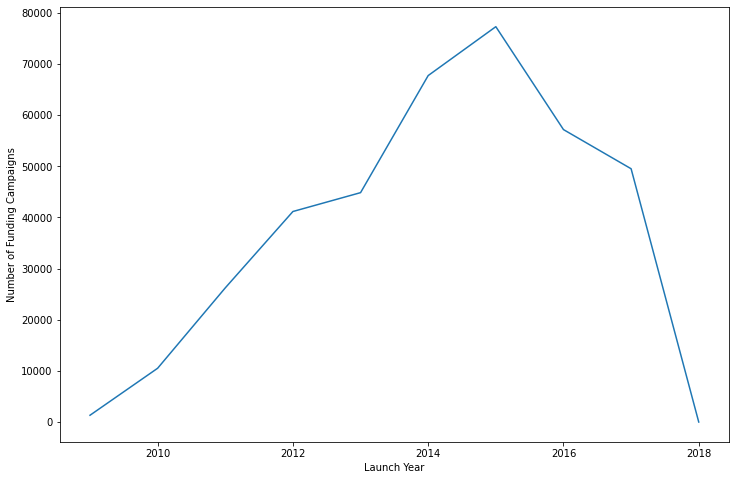

In [267]:
# Plot Year ( excluding 1970 ) and number of projects
plt.figure(figsize=(12,8))
ks[ks.launch_year > 1970].groupby('launch_year').size().plot();
plt.xlabel('Launch Year');
plt.ylabel('Number of Funding Campaigns');

There is a steep increase in number of projects from 2009 through 2015. There has been a slight downturn since 2015. We do not have complete data for 2018. 

In [268]:
# Calculate average number of projects launched per month
max_date = max(ks.launched)
min_date = min(ks.launched)
number_of_months = (max_date.year - min_date.year)*12 + max_date.month - min_date.month
ks.shape[0]/number_of_months

652.5381944444445

653 funding campaigns every month. Thats pretty good

 __What percentage of campaigns are successful?__

In [269]:
#Check counts of successful and unsuccessful campaigns
ks.state.value_counts()/ks.shape[0]

unsuccessful    0.643603
successful      0.356397
Name: state, dtype: float64

Only 36% of the projects have been successful.

__What are different categories of projects? Is Technology the dominant category?__  
__What makes a campaign successful? Is it the category, goal amount, duration, month or weekday of launch date etc.?__

In [270]:
#Function to plot bar chart for different features against outcome of the funding campaign
def plot_bar_chart(col):
    """
    Plot bar chart
    
    This function takes a feature/column name as an argument and plots a bar chart showing number of successful and unsuccessful campaigns for each value of the feature
    
    Parameters:
    col (string): Name of the column
    
    Returns:
    None
    
    """
    df = ks.groupby([col,'state']).size().unstack()
    X = sorted(ks[col].unique())
    _X = np.arange(ks[col].nunique())
    Y1 = df.successful
    Y2 = df.unsuccessful
    plt.figure(figsize=(12,8))
    successful = plt.bar(_X - 0.2, Y1, 0.4)
    unsuccessful = plt.bar(_X + 0.2, Y2, 0.4)
    plt.xticks(_X, X, rotation='vertical')
    plt.ylabel('Number of Funding Campaigns');
    plt.xlabel(col)
    plt.legend([successful, unsuccessful],['Successful','Un-Successful'])
    plt.show()
    return None

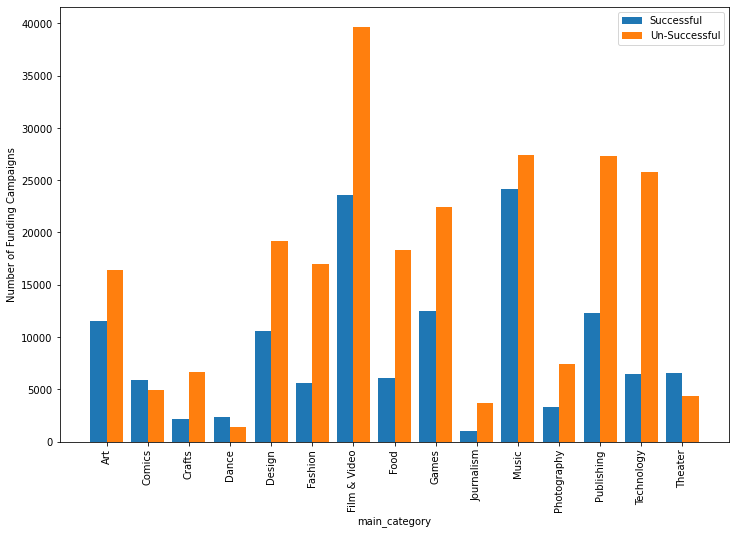

In [271]:
# Plot different categories and their counts of successful and unsuccessful campaigns
plot_bar_chart('main_category')

We can see here that most of the projects are related to Film & Video category. Film & Video, Music, Publishing, Art categories have high number of successful projects. However, percentagewise Dance/Theater appear to be the most successful category. Surprisingly, Technology is not the dominant category in any aspect.

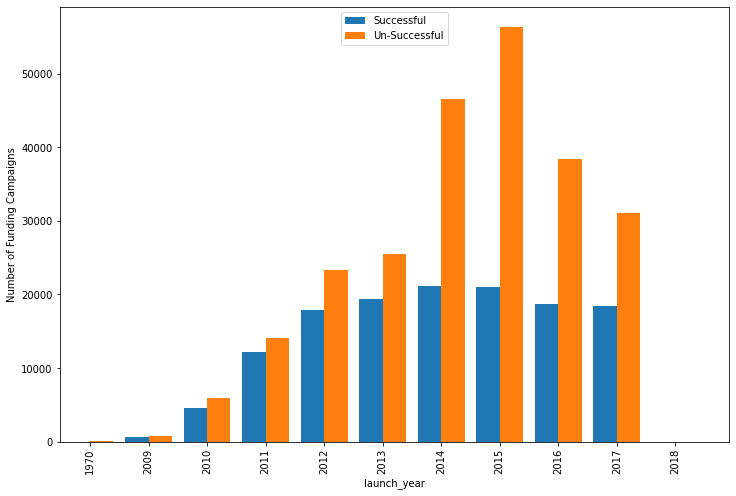

In [272]:
# Check if one year was most successful than others
plot_bar_chart('launch_year')

There has been a consistent growth in number of projects until 2015. However, number of successful projects have been roughly consistent since 2012. We do not have complete data for 2018.

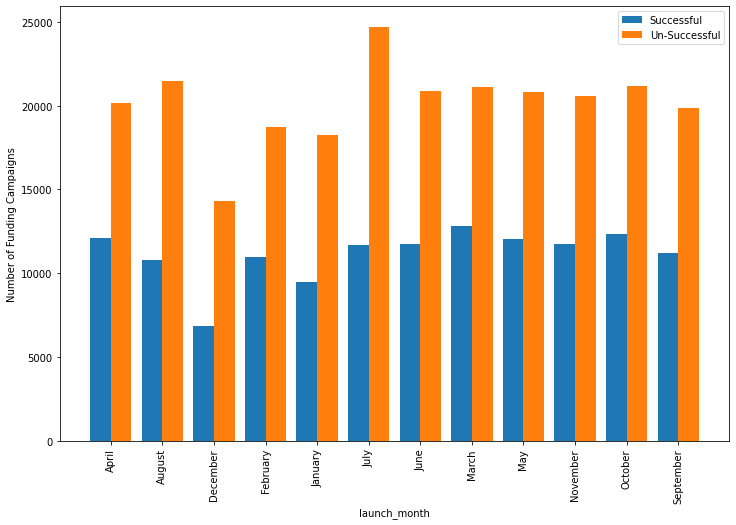

In [273]:
# Should a project be launched in a specific month?
plot_bar_chart('launch_month')

July has had largest number of projects and December the least but I do not see any significant pattern here.

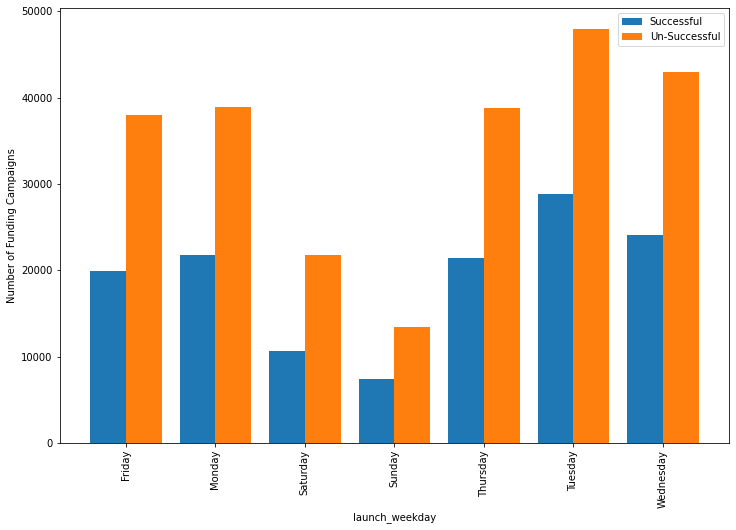

In [274]:
# Should a project be launched on a specific weekday
plot_bar_chart('launch_weekday')

Most projects are launched on Tuesday and least on Sundays. Again, I do not see any significant pattern to suggest a specific launch day is more successful over others

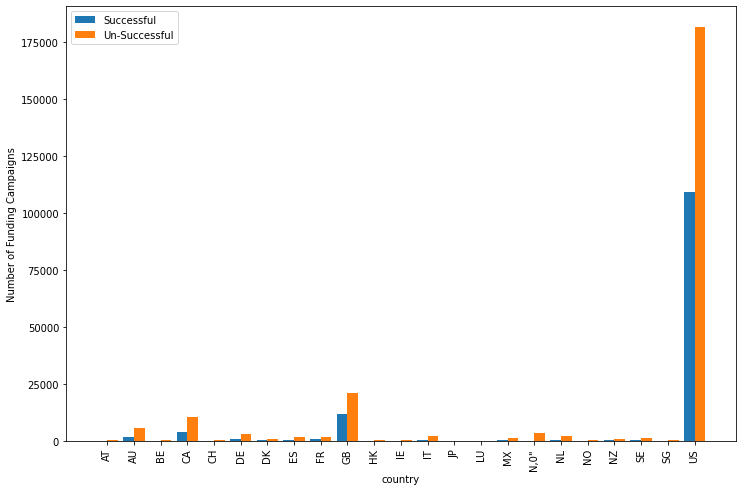

In [275]:
#Lets see which countries have most projects
plot_bar_chart('country')

Majority of the projects are from USA

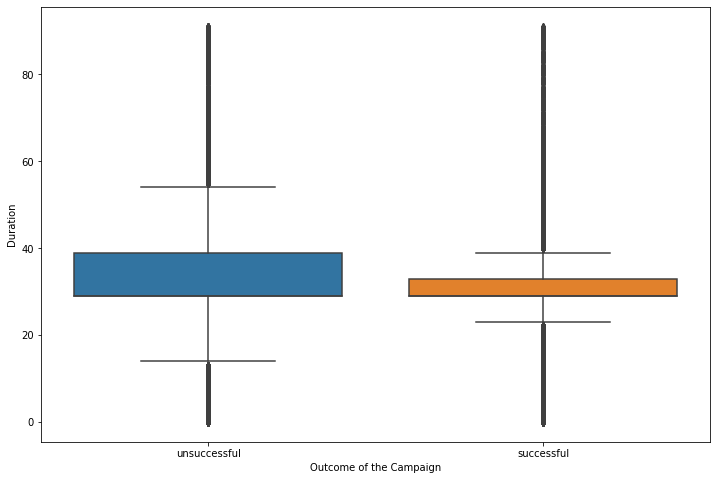

In [276]:
# Boxplot between duration and outcome of the project
plt.figure(figsize=(12,8))
sns.boxplot(x='state',y='duration', data=ks[ks.duration < 100]);
plt.xlabel('Outcome of the Campaign');
plt.ylabel('Duration');

We do have quite a few outliers but the median appears to be around 30 days for successful project campaigns.

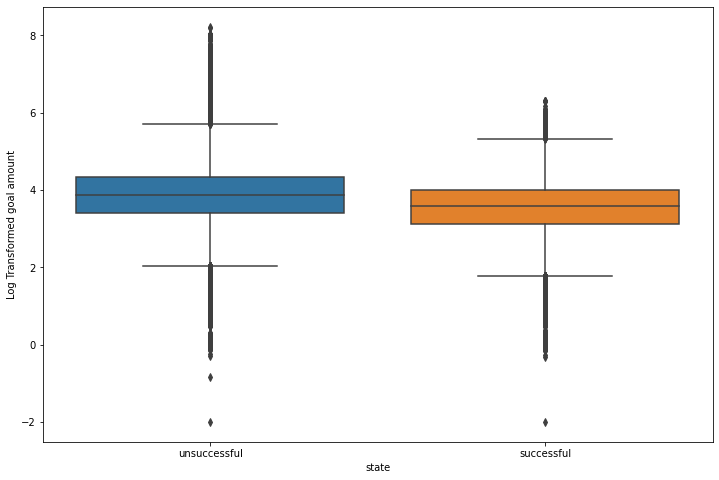

In [277]:
#boxplot between goal amount and outcome of the project
plt.figure(figsize=(12,8))
sns.boxplot(x='state', y=np.log10(ks.usd_goal_real), data=ks);
plt.ylabel('Log Transformed goal amount');

It does appear that successful campaigns have lower goal amount however the median amounts don't differ much

__What are some of the most successful campaigns?__

In [278]:
# Calculate pledge to goal ratio
ks['pledge_goal_ratio']=round(ks.usd_pledged_real/ks.usd_goal_real,2)
ks.sort_values(by='pledge_goal_ratio', ascending=False).head(5)

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,launch_month,launch_weekday,duration,pledge_goal_ratio
369176,9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,2016-08-18 09:04:03,104277.89,successful,3917,US,104277.89,1.0,2016,August,Thursday,59,104277.89
186096,1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,2016-10-14 19:04:27,68764.10,successful,955,US,68764.10,1.0,2016,October,Friday,59,68764.10
360721,907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,2015-08-10 19:31:56,55266.57,successful,1673,US,55266.57,1.0,2015,August,Monday,59,55266.57
76290,1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,2013-05-10 01:22:38,41535.01,successful,1622,US,41535.01,1.0,2013,May,Friday,30,41535.01
81368,1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,2016-07-12 00:29:12,32843.00,successful,268,US,32843.00,1.0,2016,July,Tuesday,20,32843.00


These are some of the most successful funding campaign based on pledge to goal ratio. Lets look at some of the successful campaigns by sheer pledge amount.

In [279]:
# Most successful campaigns by sheer pledge amount
ks.sort_values(by='usd_pledged_real', ascending=False).head(5)

,ID,name,category,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,launch_month,launch_weekday,duration,pledge_goal_ratio
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,500000.0,2015,February,Tuesday,31,40.68
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,50000.0,2014,July,Tuesday,52,265.70
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,1000000.0,2016,May,Tuesday,36,12.78
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,2016-11-25 06:01:41,12393139.69,successful,19264,US,12393139.69,100000.0,2016,November,Friday,43,123.93
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,100000.0,2012,April,Wednesday,37,102.67


Wow, This is just amazing. I did not know Pebble watch used crowdfunding to create one of the best fitness monitors. 20 Million dollars ..just superb!